In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_style('darkgrid')

### Собираем данные

In [2]:
index_data = pd.read_excel('Индекс надежности v4.xlsx', sheet_name='Итог')[['Банки', 'Unnamed: 22']]
index_data = index_data.loc[1:,:].rename(columns={'Банки':'Bank', 'Unnamed: 22':'Score'})
index_data['Bank'] = index_data['Bank'].apply(lambda x: str(x).lower().replace('банк', '').strip())
banks_main = list(index_data['Bank'])
index_data

c:\Anaconda\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Anaconda\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,Bank,Score
1,райффайзен,88.394855
2,юникредит,80.243639
3,сити,80.111694
4,сбер,80
5,тойота,78.012349
...,...,...
142,ростфинанс,20.002171
143,солидарность,18.0175
144,смп,14.138571
145,русский стандарт,14.043324


In [3]:
features = pd.read_excel('x_2023.xlsx').rename(columns={'bank_name':'Bank'})
features['Bank'] = features['Bank'].apply(lambda x: str(x).lower().replace('банк', '').strip())
banks_features = list(features['Bank'])
features

,Bank,Н1 CAR,Н2 liquidity,Н3 liquidity,ROA,ROE,NPL Ratio,Debt/TotalAssets,Deposits/TotalAssets,TotalLoans/TotalAssets,LDR,LiquidAssetsRatio,Z-score,КредитыЮЛ/TotalAssets,КредитыФЛ/TotalAssets,ВыданныеМБК/TotalAssets,ПривлеченныеМБК/TotalAssets,Капитал/Активы,log_TotalAssets,gos_sobstv,foreign,system
0,сбер,0.1301,0.6492,0.8628,0.027173,0.229236,0.000498,0.719662,0.497277,0.739706,1.487513,0.055970,0.018027,0.426729,0.292933,0.020044,0.071754,0.118538,24.649107,1,0,1
1,втб,0.0946,0.6091,0.8050,0.007085,0.108624,0.000996,0.600938,0.616883,0.629969,1.021214,0.052554,0.010801,0.405435,0.195504,0.029031,0.135268,0.065221,23.988575,1,0,1
2,газпром,0.1102,0.9013,0.6672,0.015635,0.192985,0.000660,0.669614,0.624800,0.693443,1.109863,0.125104,0.011589,0.621871,0.047743,0.023829,0.143947,0.081019,23.450859,1,0,0
3,альфа-,0.1191,0.9542,0.7748,0.011855,0.119078,0.000486,0.657411,0.565941,0.717789,1.268312,0.063786,0.005887,0.423053,0.234358,0.060378,0.046305,0.099558,22.852854,0,0,1
4,московский кредитный (мкб),0.1207,0.9083,0.6629,0.008277,0.108149,0.001088,0.619024,0.565755,0.719174,1.271176,0.051483,0.009191,0.576470,0.042554,0.100150,0.236052,0.076532,22.326894,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,азияпэй,5.1681,0.0000,0.0000,-0.016079,-0.034672,0.000000,0.000000,0.000000,0.981356,NaN,0.013531,NaN,0.000000,0.000000,0.981356,0.000000,0.463749,12.150174,0,0,0
335,промсвязьинвест,2.7982,0.0000,0.0000,0.038917,0.072224,0.000000,0.000000,0.337528,0.840400,2.489865,0.121168,0.063834,0.000000,0.000000,0.840400,0.000000,0.538836,12.131495,0,0,0
336,«петербургский расчетный центр»,2.9826,0.0000,0.0000,0.111599,0.124530,0.000000,0.000000,0.006607,0.951800,144.055204,0.001112,0.035063,0.000000,0.000000,0.951800,0.000000,0.896156,12.027203,0,0,0
337,«дальний восток»,0.9516,0.0000,0.0000,0.068405,0.091485,0.000000,0.000000,0.101873,0.583449,5.727233,0.098988,0.038156,0.000000,0.000000,0.583449,0.000000,0.747713,11.957419,0,0,0


In [4]:
lda_topics = pd.read_excel('lda_topics.xlsx')[['bank', 'law', 'stratagy', 'nationhood', 'securities']].rename(columns={'bank':'Bank'})
lda_topics['Bank'] = lda_topics['Bank'].apply(lambda x: str(x).lower().replace('банк', '').strip())
banks_lda = list(lda_topics['Bank'])
lda_topics

,Bank,law,stratagy,nationhood,securities
0,сбер,0.112906,0.207772,0.269092,0.410230
1,втб,0.108248,0.311809,0.195521,0.384422
2,альфа-,0.093572,0.061234,0.279384,0.565810
3,газпром,0.063467,0.429500,0.151636,0.355397
4,тинькофф,0.072422,0.098271,0.464853,0.364454
...,...,...,...,...,...
110,тольяттихим,0.936879,0.056828,0.000700,0.005594
111,кросна-,0.000779,0.000778,0.088890,0.909553
112,траст,0.260289,0.353788,0.085579,0.300344
113,фридом финанс,0.073039,0.161389,0.063817,0.701755


In [5]:
comments = pd.read_excel('bert+spectral.xlsx')[['bank', 'clusters']].rename(columns={'bank':'Bank', 'clusters':'nps_cluster'})
comments['Bank'] = comments['Bank'].apply(lambda x: str(x).lower().replace('банк', '').strip())
banks_comments = list(comments['Bank'])
comments

,Bank,nps_cluster
0,атб,3
1,абсолют,3
2,авангард,2
3,авто финанс,2
4,автоград,2
...,...,...
161,кубань кредит,2
162,нд,2
163,приморье,0
164,рнкб,2


In [6]:
news = pd.read_excel('tf_idf+spectral.xlsx')[['bank', 'clusters']].rename(columns={'bank':'Bank', 'clusters':'news_cluster'})
news['Bank'] = news['Bank'].apply(lambda x: str(x).lower().replace('банк', '').strip())
banks_news = list(news['Bank'])
news

,Bank,news_cluster
0,абсолют,5
1,азиатско-тихоокеанский,5
2,аки,1
3,александровский,3
4,алмазэргиэн,3
...,...,...
110,центрокредит,5
111,челябинвест,3
112,экспо,5
113,юг-инвест,3


In [7]:
features_portfolios = pd.read_excel('knn_banks_clusters.xlsx').rename(columns={'Банк':'Bank', 'Cluster':'porfolio_cluster'})
features_portfolios['Bank'] = features_portfolios['Bank'].apply(lambda x: str(x).lower().replace('банк', '').strip())
bank_portfolios = list(features_portfolios['Bank'])
features_portfolios

,Bank,А_акции_доля,А_векселя_доля,А_облигации_доля,А_капиталы_доля,А_корп_кредиты_доля,А_физлица_доля,А_ЛОРО_доля,А_осн_средства_доля,А_мбк_доля,А_прочие_доля,П_вклады_физлиц_доля,П_корп_средства_доля,П_счета_физлиц_доля,П_облигации_векселя_доля,П_капитал_доля,П_мбк_доля,porfolio_cluster
0,сбер,0.000952,1.206493e-05,0.129813,0.026415,0.449607,0.308638,0.007065,0.014058,0.021119,0.042321,0.292119,0.350590,0.092941,0.018406,0.153205,0.092739,0
1,втб,0.003354,0.000000e+00,0.184503,0.042916,0.424960,0.204919,0.006927,0.026645,0.030429,0.075347,0.194696,0.492168,0.081859,0.008043,0.072620,0.150614,0
2,газпром,0.002000,0.000000e+00,0.107434,0.040265,0.707183,0.054292,0.005505,0.007829,0.027098,0.048395,0.100437,0.502484,0.160175,0.019816,0.078182,0.138906,0
3,альфа-,0.003741,1.291383e-07,0.134795,0.001991,0.459535,0.254568,0.007232,0.011550,0.065584,0.061004,0.179709,0.438429,0.193794,0.028752,0.108740,0.050576,0
4,мкб,0.004365,0.000000e+00,0.177455,0.001694,0.602633,0.044486,0.019442,0.002068,0.104695,0.043163,0.110018,0.491663,0.059327,0.006559,0.081392,0.251041,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,азияпэй,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.348959,0.001577,0.647667,0.001797,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3
332,промсвязьинвест,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.002213,0.956269,0.041518,0.000000,0.278054,0.278054,0.000000,0.443891,0.000000,2
333,петербургский расчетный центр,0.001231,0.000000e+00,0.000000,0.000266,0.000000,0.000000,0.011649,0.023612,0.941760,0.021482,0.000000,0.007266,0.007266,0.000000,0.985469,0.000000,3
334,дальний восток,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.237110,0.647549,0.115342,0.000000,0.107070,0.107070,0.000000,0.785860,0.000000,3


In [8]:
fin = pd.read_excel('kmeans_c6.xlsx')[['bank_name', 'labels']].rename(columns={'bank_name':'Bank', 'labels':'fin_cluster'})
fin['Bank'] = fin['Bank'].apply(lambda x: str(x).lower().replace('банк', '').strip())
bank_fin = list(features_portfolios['Bank'])
fin

,Bank,fin_cluster
0,сбер,4
1,втб,4
2,газпром,4
3,альфа-,4
4,московский кредитный (мкб),4
...,...,...
334,азияпэй,6
335,промсвязьинвест,6
336,«петербургский расчетный центр»,6
337,«дальний восток»,5


### Составляем словарь для джоина

In [9]:
import difflib

def find_similar_keys(list1, list2):
    similar_keys = {}
    for key2 in list2:
        closest_match = difflib.get_close_matches(key2, list1, n=1)
        if closest_match:
            similar_keys[key2] = closest_match[0]
        else:
            similar_keys[key2] = None
    similar_keys = {v:k for (k,v) in similar_keys.items()}
    return similar_keys

### features

In [10]:
similar_keys = find_similar_keys(banks_features, banks_main)
print(len(similar_keys.keys()))
print(similar_keys)

137
{'райффайзен': 'райффайзен', 'юникредит': 'юникредит', 'сити': 'сити', 'сбер': 'сбер', 'тойота': 'тойота', 'дом.рф': 'дом.рф', 'авто финанс': 'авто финанс', 'втб': 'втб', 'рос': 'рос', 'отп': 'отп', '«аверс»': 'аверс', 'интеза': 'интеза', 'примсоц': 'примсоц', '«центр-инвест»': 'центр-инвест', '«левобережный»': 'левобережный', 'челябинвест': 'челябинвест', 'альфа-': 'альфа-', 'газпром': 'газпром', 'ингосстрах': 'ингосстрах', 'россельхоз': 'россельхоз', '«открытие»': 'открытие', 'совком': 'совком', 'промсвязьинвест': 'промсвязь', 'кредит европа': 'кредит европа', '«кубань кредит»': 'кубань кредит', '«хлынов»': 'хлынов', 'тольяттихим': 'тольяттихим', 'акцепт': 'акцепт', 'ренессанс': 'ренессанс', 'финсервис': 'финсервис', 'энерготранс': 'энерготранс', '«татсоц»': 'татсоц', 'прио-внешторг': 'прио-внешторг', 'аки': 'аки', '«оренбург»': 'оренбург', None: 'убрир', '«форштадт»': 'форштадт', 'хакасский муниципальный': 'хакасский муниципальный', 'сибсоц': 'сибсоц', 'контур.': 'контур.', 'вла

In [11]:
features_dict = {'райффайзен': 'райффайзен', 'юникредит': 'юникредит', 'сити': 'сити', 'сбер': 'сбер', 'тойота': 'тойота', 'дом.рф': 'дом.рф', 'авто финанс': 'авто финанс', 'втб': 'втб', 'рос': 'рос', 'отп': 'отп', '«аверс»': 'аверс', 'интеза': 'интеза', '«центр-инвест»': 'центр-инвест', '«левобережный»': 'левобережный', 'челябинвест': 'челябинвест', 'альфа-': 'альфа-', 'газпром': 'газпром', 'ингосстрах': 'ингосстрах', 'россельхоз': 'россельхоз', '«открытие»': 'открытие', 'совком': 'совком', 'промсвязьинвест': 'промсвязь', 'кредит европа': 'кредит европа', '«кубань кредит»': 'кубань кредит', '«хлынов»': 'хлынов', 'тольяттихим': 'тольяттихим', 'акцепт': 'акцепт', 'ренессанс': 'ренессанс', 'финсервис': 'финсервис', 'энерготранс': 'энерготранс', '«татсоц»': 'татсоц', 'прио-внешторг': 'прио-внешторг', 'аки': 'аки', '«оренбург»': 'оренбург', 'уральский реконструкции и развития (убрир)': 'убрир', '«форштадт»': 'форштадт', 'хакасский муниципальный': 'хакасский муниципальный', 'сибсоц': 'сибсоц', 'контур.': 'контур.', 'владбизнес': 'владбизнес', 'ноксс': 'ноксс', 'азиатско-тихоокеанский  (атб)': 'азиатско-тихоокеанский', 'метком': 'метком', 'алмазэргиэн': 'алмазэргиэн', 'юг-инвест': 'юг-инвест', 'тинькофф': 'тинькофф', '«россия»': 'россия', 'новиком': 'новиком', 'арес': 'арес', 'нико-': 'нико-', 'кузнецкбизнес': 'кузнецкбизнес', '«кузнецкий»': 'кузнецкий', '«центрокредит»': 'центрокредит', '«кошелев-»': 'кошелев-', '«санкт-петербург»': 'санкт-петербург', 'мтс': 'мтс', 'рнкб': 'рнкб', '«агропромкредит»': 'агропромкредит', 'энерго': 'энерго', 'казани': 'казани', 'кетовский коммерческий': 'камский коммерческий', 'ткб': 'ткб', 'фора-': 'фора-', '«держава»': 'держава', 'реалист': 'реалист', '«пойдём!»': 'пойдём!', '«вологжанин»': 'вологжанин', 'почта': 'почта', 'металлинвест': 'балтинвест', 'локо-': 'локо-', 'сдм-': 'сдм-', 'челинд': 'челинд', 'интерпрогресс': 'интерпрогресс', 'урал фд': 'урал фд', 'нк': 'нк', 'алеф-': 'алеф-', 'птб': 'птб', 'ак барс': 'ак барс', 'зенит': 'зенит', 'абсолют': 'абсолют', 'росдор': 'росдор', 'норвик': 'норвик', 'русский стандарт': 'русский стандарт', 'тендер': 'тендер-', 'экспо': 'экспо', 'сургутнефтегаз': 'сургутнефтегаз', 'севергаз': 'севергаз', 'кредит урал': 'кредит урал', 'нс': 'нс', 'автоторг': 'автоторг', '«венец»': 'венец', '«снежинский»': 'снежинский', 'ново': 'ново', 'нацинвестпром': 'нацинвестпром', '«енисейский объединенный »': 'енисейский объединенный', 'оранжевый': 'оранжевый', 'костромасельком': 'костромасельком', 'еатп': 'еатп', 'уралсиб': 'уралсиб', 'дальневосточный': 'дальневосточный', 'мс  рус': 'мс  рус', '«фольксваген  рус»': 'фольксваген', '«александровский»': 'александровский', 'солид': 'солид', 'автоград': 'автоград', 'драйв клик': 'драйв клик', 'авангард': 'авангард', 'бмв': 'бмв', 'ген': 'ген', '«пскб»': 'пскб', '«развитие-столица»': 'развитие-столица', 'томскпромстрой': 'томскпромстрой', 'инкахран': 'синара', 'газэнерго': 'газэнерго', 'сити инвест': 'сити инвест', 'бст-': 'бст-', '«цифра »': 'цифра', 'дата': 'дата', 'бжф': 'бжф', 'первый клиентский': 'первый клиентский', '«приморье»': 'приморье', 'вуз-': 'вуз-', 'ланта-': 'ланта-', 'быстро': 'быстро', 'бм-': 'бм-', '«траст»': 'траст', 'таврический': 'таврический', 'хоум': 'хоум', 'ростфинанс': 'ростфинанс', '«солидарность»': 'солидарность', 'спб': 'смп', 'инвестторг': 'инвестторг'}
features['Bank'] = features['Bank'].map(features_dict)

In [12]:
regression_data = index_data.merge(features, on='Bank', how='left')

### fin clusters

In [13]:
fin['Bank'] = fin['Bank'].map(features_dict)

In [14]:
regression_data = regression_data.merge(fin, on='Bank', how='left')

### comments

In [15]:
similar_keys = find_similar_keys(banks_comments, banks_main)
print(len(similar_keys.keys()))
print(similar_keys)

115
{'райффайзен': 'райффайзен', 'юникредит': 'юникредит', 'сити': 'сити', 'сбер': 'сбер', 'тойота': 'тойота', 'дом.рф': 'дом.рф', 'авто финанс': 'авто финанс', 'втб': 'втб', 'рос': 'рос', 'отп': 'отп', 'аверс': 'арес', 'интеза': 'интеза', 'примсоц': 'сибсоц', 'центр-инвест': 'сити инвест', 'левобережный': 'левобережный', 'челябинвест': 'челябинвест', 'альфа-': 'альфа-', 'газпром': 'газпром', 'ингосстрах': 'ингосстрах', 'россельхоз': 'россельхоз', 'открытие': 'открытие', 'совком': 'совком', 'промсвязь': 'промсвязь', 'кредит европа': 'кредит европа', 'кубань кредит': 'кубань кредит', 'хлынов': 'хлынов', None: 'солидарность', 'акцепт': 'акцепт', 'ренессанс': 'ренессанс', 'финсервис': 'финсервис', 'энерго': 'энерго', 'татсоц': 'татсоц', 'прио-внешторг': 'прио-внешторг', 'аки': 'аки', 'оренбург': 'оренбург', 'мб': 'мб', 'форштадт': 'форштадт', 'контур.': 'контур.', 'владбизнес': 'владбизнес', 'моском': 'моском', 'алмазэргиэн': 'алмазэргиэн', 'гарант-инвест': 'юг-инвест', 'тинькофф': 'тиньк

In [16]:
comments_dict = {'райффайзен': 'райффайзен', 'юникредит': 'юникредит', 'сити': 'сити', 'сбер': 'сбер', 'тойота': 'тойота', 'дом.рф': 'дом.рф', 'авто финанс': 'авто финанс', 'втб': 'втб', 'рос': 'рос', 'отп': 'отп', 'аверс': 'арес', 'интеза': 'интеза', 'центр-инвест': 'сити инвест', 'левобережный': 'левобережный', 'челябинвест': 'челябинвест', 'альфа-': 'альфа-', 'газпром': 'газпром', 'ингосстрах': 'ингосстрах', 'россельхоз': 'россельхоз', 'открытие': 'открытие', 'совком': 'совком', 'промсвязь': 'промсвязь', 'кредит европа': 'кредит европа', 'кубань кредит': 'кубань кредит', 'хлынов': 'хлынов', 'cолидарность': 'солидарность', 'акцепт': 'акцепт', 'ренессанс': 'ренессанс', 'финсервис': 'финсервис', 'энерго': 'энерго', 'татсоц': 'татсоц', 'прио-внешторг': 'прио-внешторг', 'аки': 'аки', 'оренбург': 'оренбург', 'мб': 'мб', 'форштадт': 'форштадт', 'контур.': 'контур.', 'владбизнес': 'владбизнес', 'моском': 'моском', 'алмазэргиэн': 'алмазэргиэн', 'юг-инвест': 'юг-инвест', 'тинькофф': 'тинькофф', 'россия': 'россия', 'вбрр': 'вбрр', 'новиком': 'ново', 'нр': 'нр', 'нико-': 'нико-', 'ресо кредит': 'центрокредит', 'санкт-петербург': 'санкт-петербург', 'мтс': 'мтс', 'рнкб': 'нк', 'ббр': 'ббр', 'эс-би-ай': 'эс-би-ай', 'агропромкредит': 'агропромкредит', 'казани': 'казани', 'камский коммерческий': 'камский коммерческий', 'мкб': 'мкб', 'фора-': 'фора-', 'реалист': 'реалист', 'пойдём!': 'пойдём!', 'почта': 'почта', 'металлинвест': 'металлинвест', 'локо-': 'локо-', 'сдм-': 'сдм-', 'челинд': 'челинд', 'интерпрогресс': 'интерпрогресс', 'алеф-': 'алеф-', 'птб': 'птб', 'ак барс': 'ак барс', 'зенит': 'зенит', 'абсолют': 'абсолют', 'росдор': 'росдор', 'норвик': 'норвик', 'русский народный': 'русский народный', 'ткб': 'ткб', 'экспо': 'экспо', 'сургутнефтегаз': 'сургутнефтегаз', 'севергаз': 'севергаз', 'кредит урал': 'кредит урал', 'нс': 'нс', 'автоторг': 'автоторг', 'инвестторг': 'инвестторг', 'оранжевый': 'оранжевый', 'уралсиб': 'уралсиб', 'дальневосточный': 'дальневосточный', 'мс  рус': 'мс  рус', 'фольксваген': 'фольксваген', 'александровский': 'александровский', 'солид': 'солид', 'автоград': 'автоград', 'драйв клик': 'драйв клик', 'авангард': 'авангард', 'бмв': 'бмв', 'ген': 'ген', 'пскб': 'пскб', 'томскпромстрой': 'томскпромстрой', 'синара': 'синара', 'газэнерго': 'газэнерго', 'быстро': 'быстро', 'цифра': 'цифра', 'ланта-': 'ланта-', 'бжф': 'бжф', 'первый инвестиционный': 'первый клиентский', 'приморье': 'приморье', 'вуз-': 'вуз-', 'убрир': 'убрир', 'мособл': 'мособл', 'бм-': 'бм-', 'траст': 'траст', 'таврический': 'таврический', 'хоум': 'хоум', 'ростфинанс': 'ростфинанс', 'смп': 'смп', 'русский стандарт': 'русский стандарт'}
comments['Bank'] = comments['Bank'].map(comments_dict)

In [17]:
regression_data = regression_data.merge(comments, on='Bank', how='left')

### lda

In [18]:
similar_keys = find_similar_keys(banks_lda, banks_main)
print(len(similar_keys.keys()))
print(similar_keys)

105
{'райффайзен': 'райффайзен', 'юникредит': 'юникредит', 'сити': 'сити', 'сбер': 'сбер', 'тойота': 'тойота', 'дом.рф': 'дом.рф', 'фридом финанс': 'авто финанс', 'втб': 'птб', 'рос': 'росдор', 'отп': 'отп', 'барс': 'ак барс', 'интеза': 'интеза', 'примсоц': 'сибсоц', 'центр-инвест': 'центр-инвест', 'левобережный': 'левобережный', 'челябинвест': 'челябинвест', 'альфа-': 'алеф-', 'газпром': 'газпром', None: 'хоум', 'россельхоз': 'россельхоз', 'открытие': 'открытие', 'совком': 'совком', 'промсвязь': 'промсвязь', 'кредит европа': 'кредит европа', 'кубань кредит': 'кубань кредит', 'хлынов': 'хлынов', 'тольяттихим': 'тольяттихим', 'акцепт': 'акцепт', 'ренессанс кредит': 'ренессанс', 'финсервис': 'финсервис', 'газэнерго': 'газэнерго', 'инвестторг': 'инвестторг', 'аки': 'аки', 'оренбург': 'оренбург', 'мкб': 'ткб', 'фора-': 'цифра', 'азиатско-тихоокеанский': 'азиатско-тихоокеанский', 'алмазэргиэн': 'алмазэргиэн', 'юг-инвест': 'юг-инвест', 'тинькофф': 'тинькофф', 'вбрр': 'вбрр', 'новиком': 'ново

In [19]:
lda_dict = {'райффайзен': 'райффайзен', 'юникредит': 'юникредит', 'сити': 'сити', 'сбер': 'сбер', 'тойота': 'тойота', 'дом.рф': 'дом.рф', 'втб': 'втб', 'рос': 'рос', 'отп': 'отп', 'барс': 'ак барс', 'интеза': 'интеза', 'примсоц': 'примсоц', 'центр-инвест': 'центр-инвест', 'левобережный': 'левобережный', 'челябинвест': 'челябинвест', 'альфа-': 'алеф-', 'газпром': 'газпром', 'хоум кредит': 'хоум', 'россельхоз': 'россельхоз', 'открытие': 'открытие', 'совком': 'совком', 'промсвязь': 'промсвязь', 'кредит европа': 'кредит европа', 'кубань кредит': 'кубань кредит', 'хлынов': 'хлынов', 'тольяттихим': 'тольяттихим', 'акцепт': 'акцепт', 'ренессанс кредит': 'ренессанс', 'финсервис': 'финсервис', 'газэнерго': 'газэнерго', 'инвестторг': 'инвестторг', 'аки': 'аки', 'оренбург': 'оренбург', 'мкб': 'мкб', 'фора-': 'цифра', 'азиатско-тихоокеанский': 'азиатско-тихоокеанский', 'алмазэргиэн': 'алмазэргиэн', 'юг-инвест': 'юг-инвест', 'тинькофф': 'тинькофф', 'вбрр': 'вбрр', 'новиком': 'ново', 'нико-': 'нико-', 'кузнецкий': 'кузнецкий', 'центрокредит': 'центрокредит', 'кошелев-': 'кошелев-', 'санкт-петербург': 'санкт-петербург', 'мтс': 'мтс', 'рнкб': 'рнкб', 'ббр': 'ббр', 'мин': 'мин', 'хоум кредит': 'агропромкредит', 'казани': 'казани', 'держава': 'держава', 'реалист': 'реалист', 'вологжанин': 'вологжанин', 'почта': 'почта', 'металлинвест': 'металлинвест', 'локо-': 'локо-', 'сдм-': 'сдм-', 'интерпрогресс': 'интерпрогресс', 'нк': 'нк', 'зенит': 'зенит', 'абсолют': 'абсолют', 'норвик': 'норвик', 'русский народный': 'русский народный', 'тендер-': 'тендер-', 'экспо': 'экспо', 'сургутнефтегаз': 'сургутнефтегаз', 'севергаз': 'севергаз', 'кредит урал': 'кредит урал', 'нс': 'нс', 'венец': 'венец', 'снежинский': 'снежинский', 'оранжевый': 'оранжевый', 'уралсиб': 'уралсиб', 'москоммерц': 'моском', 'дальневосточный': 'дальневосточный', 'мс  рус': 'мс  рус', 'фольксваген  рус': 'фольксваген', 'александровский': 'александровский', 'солид': 'солид', 'пересвет': 'пересвет', 'авангард': 'авангард', 'бмв': 'бмв', 'ген': 'ген', 'пскб': 'пскб', 'развитие-столица': 'развитие-столица', 'синара': 'синара', 'сити инвест': 'сити инвест', 'быстро': 'быстро', 'ланта-': 'ланта-', 'первый клиентский': 'первый клиентский', 'приморье': 'приморье', 'вуз-': 'вуз-', 'убрир': 'убрир', 'мособл': 'мособл', 'бм-': 'бм-', 'траст': 'траст', 'таврический': 'таврический', 'балтинвест': 'балтинвест', 'ростфинанс': 'ростфинанс', 'солидарность': 'солидарность', 'смп': 'смп', 'русский стандарт': 'русский стандарт'}
lda_topics['Bank'] = lda_topics['Bank'].map(lda_dict)

In [20]:
regression_data = regression_data.merge(lda_topics, on='Bank', how='left')

### news

In [21]:
news_dict = {'райффайзен': 'райффайзен', 'юникредит': 'юникредит', 'сити': 'сити', 'сбер': 'сбер', 'тойота': 'тойота', 'дом.рф': 'дом.рф', 'втб': 'втб', 'рос': 'рос', 'отп': 'отп', 'барс': 'ак барс', 'интеза': 'интеза', 'примсоц': 'примсоц', 'центр-инвест': 'центр-инвест', 'левобережный': 'левобережный', 'челябинвест': 'челябинвест', 'альфа-': 'алеф-', 'газпром': 'газпром', 'хоум кредит': 'хоум', 'россельхоз': 'россельхоз', 'открытие': 'открытие', 'совком': 'совком', 'промсвязь': 'промсвязь', 'кредит европа': 'кредит европа', 'кубань кредит': 'кубань кредит', 'хлынов': 'хлынов', 'тольяттихим': 'тольяттихим', 'акцепт': 'акцепт', 'ренессанс кредит': 'ренессанс', 'финсервис': 'финсервис', 'газэнерго': 'газэнерго', 'инвестторг': 'инвестторг', 'аки': 'аки', 'оренбург': 'оренбург', 'мкб': 'мкб', 'фора-': 'цифра', 'азиатско-тихоокеанский': 'азиатско-тихоокеанский', 'алмазэргиэн': 'алмазэргиэн', 'юг-инвест': 'юг-инвест', 'тинькофф': 'тинькофф', 'вбрр': 'вбрр', 'новиком': 'ново', 'нико-': 'нико-', 'кузнецкий': 'кузнецкий', 'центрокредит': 'центрокредит', 'кошелев-': 'кошелев-', 'санкт-петербург': 'санкт-петербург', 'мтс': 'мтс', 'рнкб': 'рнкб', 'ббр': 'ббр', 'мин': 'мин', 'хоум кредит': 'агропромкредит', 'казани': 'казани', 'держава': 'держава', 'реалист': 'реалист', 'вологжанин': 'вологжанин', 'почта': 'почта', 'металлинвест': 'металлинвест', 'локо-': 'локо-', 'сдм-': 'сдм-', 'интерпрогресс': 'интерпрогресс', 'нк': 'нк', 'зенит': 'зенит', 'абсолют': 'абсолют', 'норвик': 'норвик', 'русский народный': 'русский народный', 'тендер-': 'тендер-', 'экспо': 'экспо', 'сургутнефтегаз': 'сургутнефтегаз', 'севергаз': 'севергаз', 'кредит урал': 'кредит урал', 'нс': 'нс', 'венец': 'венец', 'снежинский': 'снежинский', 'оранжевый': 'оранжевый', 'уралсиб': 'уралсиб', 'москоммерц': 'моском', 'дальневосточный': 'дальневосточный', 'мс  рус': 'мс  рус', 'фольксваген  рус': 'фольксваген', 'александровский': 'александровский', 'солид': 'солид', 'пересвет': 'пересвет', 'авангард': 'авангард', 'бмв': 'бмв', 'ген': 'ген', 'пскб': 'пскб', 'развитие-столица': 'развитие-столица', 'синара': 'синара', 'сити инвест': 'сити инвест', 'быстро': 'быстро', 'ланта-': 'ланта-', 'первый клиентский': 'первый клиентский', 'приморье': 'приморье', 'вуз-': 'вуз-', 'убрир': 'убрир', 'мособл': 'мособл', 'бм-': 'бм-', 'траст': 'траст', 'таврический': 'таврический', 'балтинвест': 'балтинвест', 'ростфинанс': 'ростфинанс', 'солидарность': 'солидарность', 'смп': 'смп', 'русский стандарт': 'русский стандарт'}
news['Bank'] = news['Bank'].map(news_dict)

In [22]:
regression_data = regression_data.merge(news, on='Bank', how='left')

### portfolios

In [23]:
similar_keys = find_similar_keys(bank_portfolios, banks_main)
print(len(similar_keys.keys()))
print(similar_keys)

140
{'райффайзен': 'райффайзен', 'юникредит': 'юникредит', 'сити': 'сити', 'сбер': 'сбер', 'тойота': 'тойота', 'дом.рф': 'дом.рф', 'авто финанс': 'авто финанс', 'втб': 'втб', 'рос': 'рос', 'отп': 'отп', 'аверс': 'аверс', 'интеза': 'интеза', 'примсоц': 'примсоц', 'центр-инвест': 'центр-инвест', 'левобережный': 'левобережный', 'челябинвест': 'челябинвест', 'альфа-': 'альфа-', 'газпром': 'газпром', 'ингосстрах': 'ингосстрах', 'россельхоз': 'россельхоз', 'открытие': 'открытие', 'совком': 'совком', 'промсвязьинвест': 'промсвязь', 'кредит европа': 'кредит европа', 'кубань кредит': 'кубань кредит', 'хлынов': 'хлынов', 'тольяттихим': 'тольяттихим', 'акцепт': 'акцепт', 'ренессанс': 'ренессанс', 'финсервис': 'финсервис', 'энерготранс': 'энерготранс', 'татсоц': 'татсоц', 'прио-внешторг': 'прио-внешторг', 'аки': 'аки', 'оренбург': 'оренбург', 'мб': 'мб', 'форштадт': 'форштадт', 'хакасский муниципальный': 'хакасский муниципальный', 'сибсоц': 'сибсоц', 'контур.': 'контур.', 'владбизнес': 'владбизнес

In [24]:
portfolios_dict = {'райффайзен': 'райффайзен', 'юникредит': 'юникредит', 'сити': 'сити', 'сбер': 'сбер', 'тойота': 'тойота', 'дом.рф': 'дом.рф', 'авто финанс': 'авто финанс', 'втб': 'втб', 'рос': 'рос', 'отп': 'отп', 'аверс': 'аверс', 'интеза': 'интеза', 'примсоц': 'примсоц', 'центр-инвест': 'центр-инвест', 'левобережный': 'левобережный', 'челябинвест': 'челябинвест', 'альфа-': 'альфа-', 'газпром': 'газпром', 'ингосстрах': 'ингосстрах', 'россельхоз': 'россельхоз', 'открытие': 'открытие', 'совком': 'совком', 'промсвязьинвест': 'промсвязь', 'кредит европа': 'кредит европа', 'кубань кредит': 'кубань кредит', 'хлынов': 'хлынов', 'тольяттихим': 'тольяттихим', 'акцепт': 'акцепт', 'ренессанс': 'ренессанс', 'финсервис': 'финсервис', 'энерготранс': 'энерготранс', 'татсоц': 'татсоц', 'прио-внешторг': 'прио-внешторг', 'аки': 'аки', 'оренбург': 'оренбург', 'мб': 'мб', 'форштадт': 'форштадт', 'хакасский муниципальный': 'хакасский муниципальный', 'сибсоц': 'сибсоц', 'контур.': 'контур.', 'владбизнес': 'владбизнес', 'ноксс': 'ноксс', 'азиатско-тихоокеанский': 'азиатско-тихоокеанский', 'метком': 'метком', 'алмазэргиэн': 'алмазэргиэн', 'юг-инвест': 'юг-инвест', 'тинькофф': 'тинькофф', 'россия': 'россия', 'убрир': 'убрир', 'новиком': 'новиком', 'нр': 'нр', 'арес': 'арес', 'нико-': 'нико-', 'кузнецкбизнес': 'кузнецкбизнес', 'кузнецкий': 'кузнецкий', 'центрокредит': 'центрокредит', 'кошелев-': 'кошелев-', 'санкт-петербург': 'санкт-петербург', 'мтс': 'мтс', 'рнкб': 'рнкб', 'ббр': 'ббр', 'эс-би-ай': 'эс-би-ай', 'агропромкредит': 'агропромкредит', 'энерго': 'энерго', 'казани': 'казани', 'камский коммерческий': 'камский коммерческий', 'мкб': 'мкб', 'фора-': 'фора-', 'держава': 'держава', 'реалист': 'реалист', 'пойдём!': 'пойдём!', 'вологжанин': 'вологжанин', 'почта': 'почта', 'металлинвест': 'балтинвест', 'локо-': 'локо-', 'сдм-': 'сдм-', 'челинд': 'челинд', 'интерпрогресс': 'интерпрогресс', 'урал фд': 'урал фд', 'нк': 'нк', 'алеф-': 'алеф-', 'птб': 'птб', 'ак барс': 'ак барс', 'зенит': 'зенит', 'абсолют': 'абсолют', 'росдор': 'росдор', 'норвик': 'норвик', 'русский народный': 'русский народный', 'тендер-': 'тендер-', 'ткб': 'ткб', 'экспо': 'экспо', 'сургутнефтегаз': 'сургутнефтегаз', 'севергаз': 'севергаз', 'кредит урал': 'кредит урал', 'нс': 'нс', 'автоторг': 'автоторг', 'венец': 'венец', 'снежинский': 'снежинский', 'ново': 'ново', 'нацинвестпром': 'нацинвестпром', 'енисейский объединенный': 'енисейский объединенный', 'оранжевый': 'оранжевый', 'костромасельком': 'костромасельком', 'еатп': 'еатп', 'уралсиб': 'уралсиб', 'моском': 'мособл', 'дальневосточный': 'дальневосточный', 'мс  рус': 'мс  рус', 'фольксваген': 'фольксваген', 'александровский': 'александровский', 'солид': 'солид', 'автоград': 'автоград', None: 'таврический', 'драйв клик': 'драйв клик', 'авангард': 'авангард', 'бмв': 'бмв', 'ген': 'ген', 'пскб': 'пскб', 'развитие-столица': 'развитие-столица', 'томскпромстрой': 'томскпромстрой', 'синара': 'синара', 'газэнерго': 'газэнерго', 'сити инвест': 'сити инвест', 'бст-': 'бст-', 'цифра': 'цифра', 'дата': 'дата', 'бжф': 'бжф', 'первый клиентский': 'первый клиентский', 'приморье': 'приморье', 'ланта-': 'ланта-', 'быстро': 'быстро', 'бм-': 'бм-', 'трансстрой': 'траст', 'хоум': 'хоум', 'ростфинанс': 'ростфинанс', 'солидарность': 'солидарность', 'русский стандарт': 'русский стандарт', 'инвестторг': 'инвестторг'}
features_portfolios['Bank'] = features_portfolios['Bank'].map(portfolios_dict)

In [25]:
regression_data = regression_data.merge(features_portfolios, on='Bank', how='left')

In [26]:
regression_data.to_excel('regression_data.xlsx')

### Доработка таблицы

In [30]:
from sklearn.impute import KNNImputer

In [31]:
regression_data = pd.read_excel('regression_data.xlsx').drop(columns=['Unnamed: 0', 'log_TotalAssets'], axis=1)

In [33]:
target_feat = ['Bank', 'Score']
cat_feat = ['gos_sobstv', 'foreign', 'system', 'nps_cluster', 'porfolio_cluster', 'fin_cluster']
num_feat = list(set(regression_data.columns) - set(cat_feat) - set(target_feat))

In [34]:
imputer = KNNImputer(n_neighbors=5)
fill_miss = imputer.fit_transform(regression_data[num_feat])
regression_data[num_feat] = fill_miss

In [35]:
imputer = KNNImputer(n_neighbors=5)
fill_miss = np.round(imputer.fit_transform(regression_data[cat_feat]))
regression_data[cat_feat] = fill_miss

C:\Users\Ильгар\AppData\Local\Temp\ipykernel_1172\3025488679.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(regression_data.corr(method='pearson').round(2), annot=True, cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)


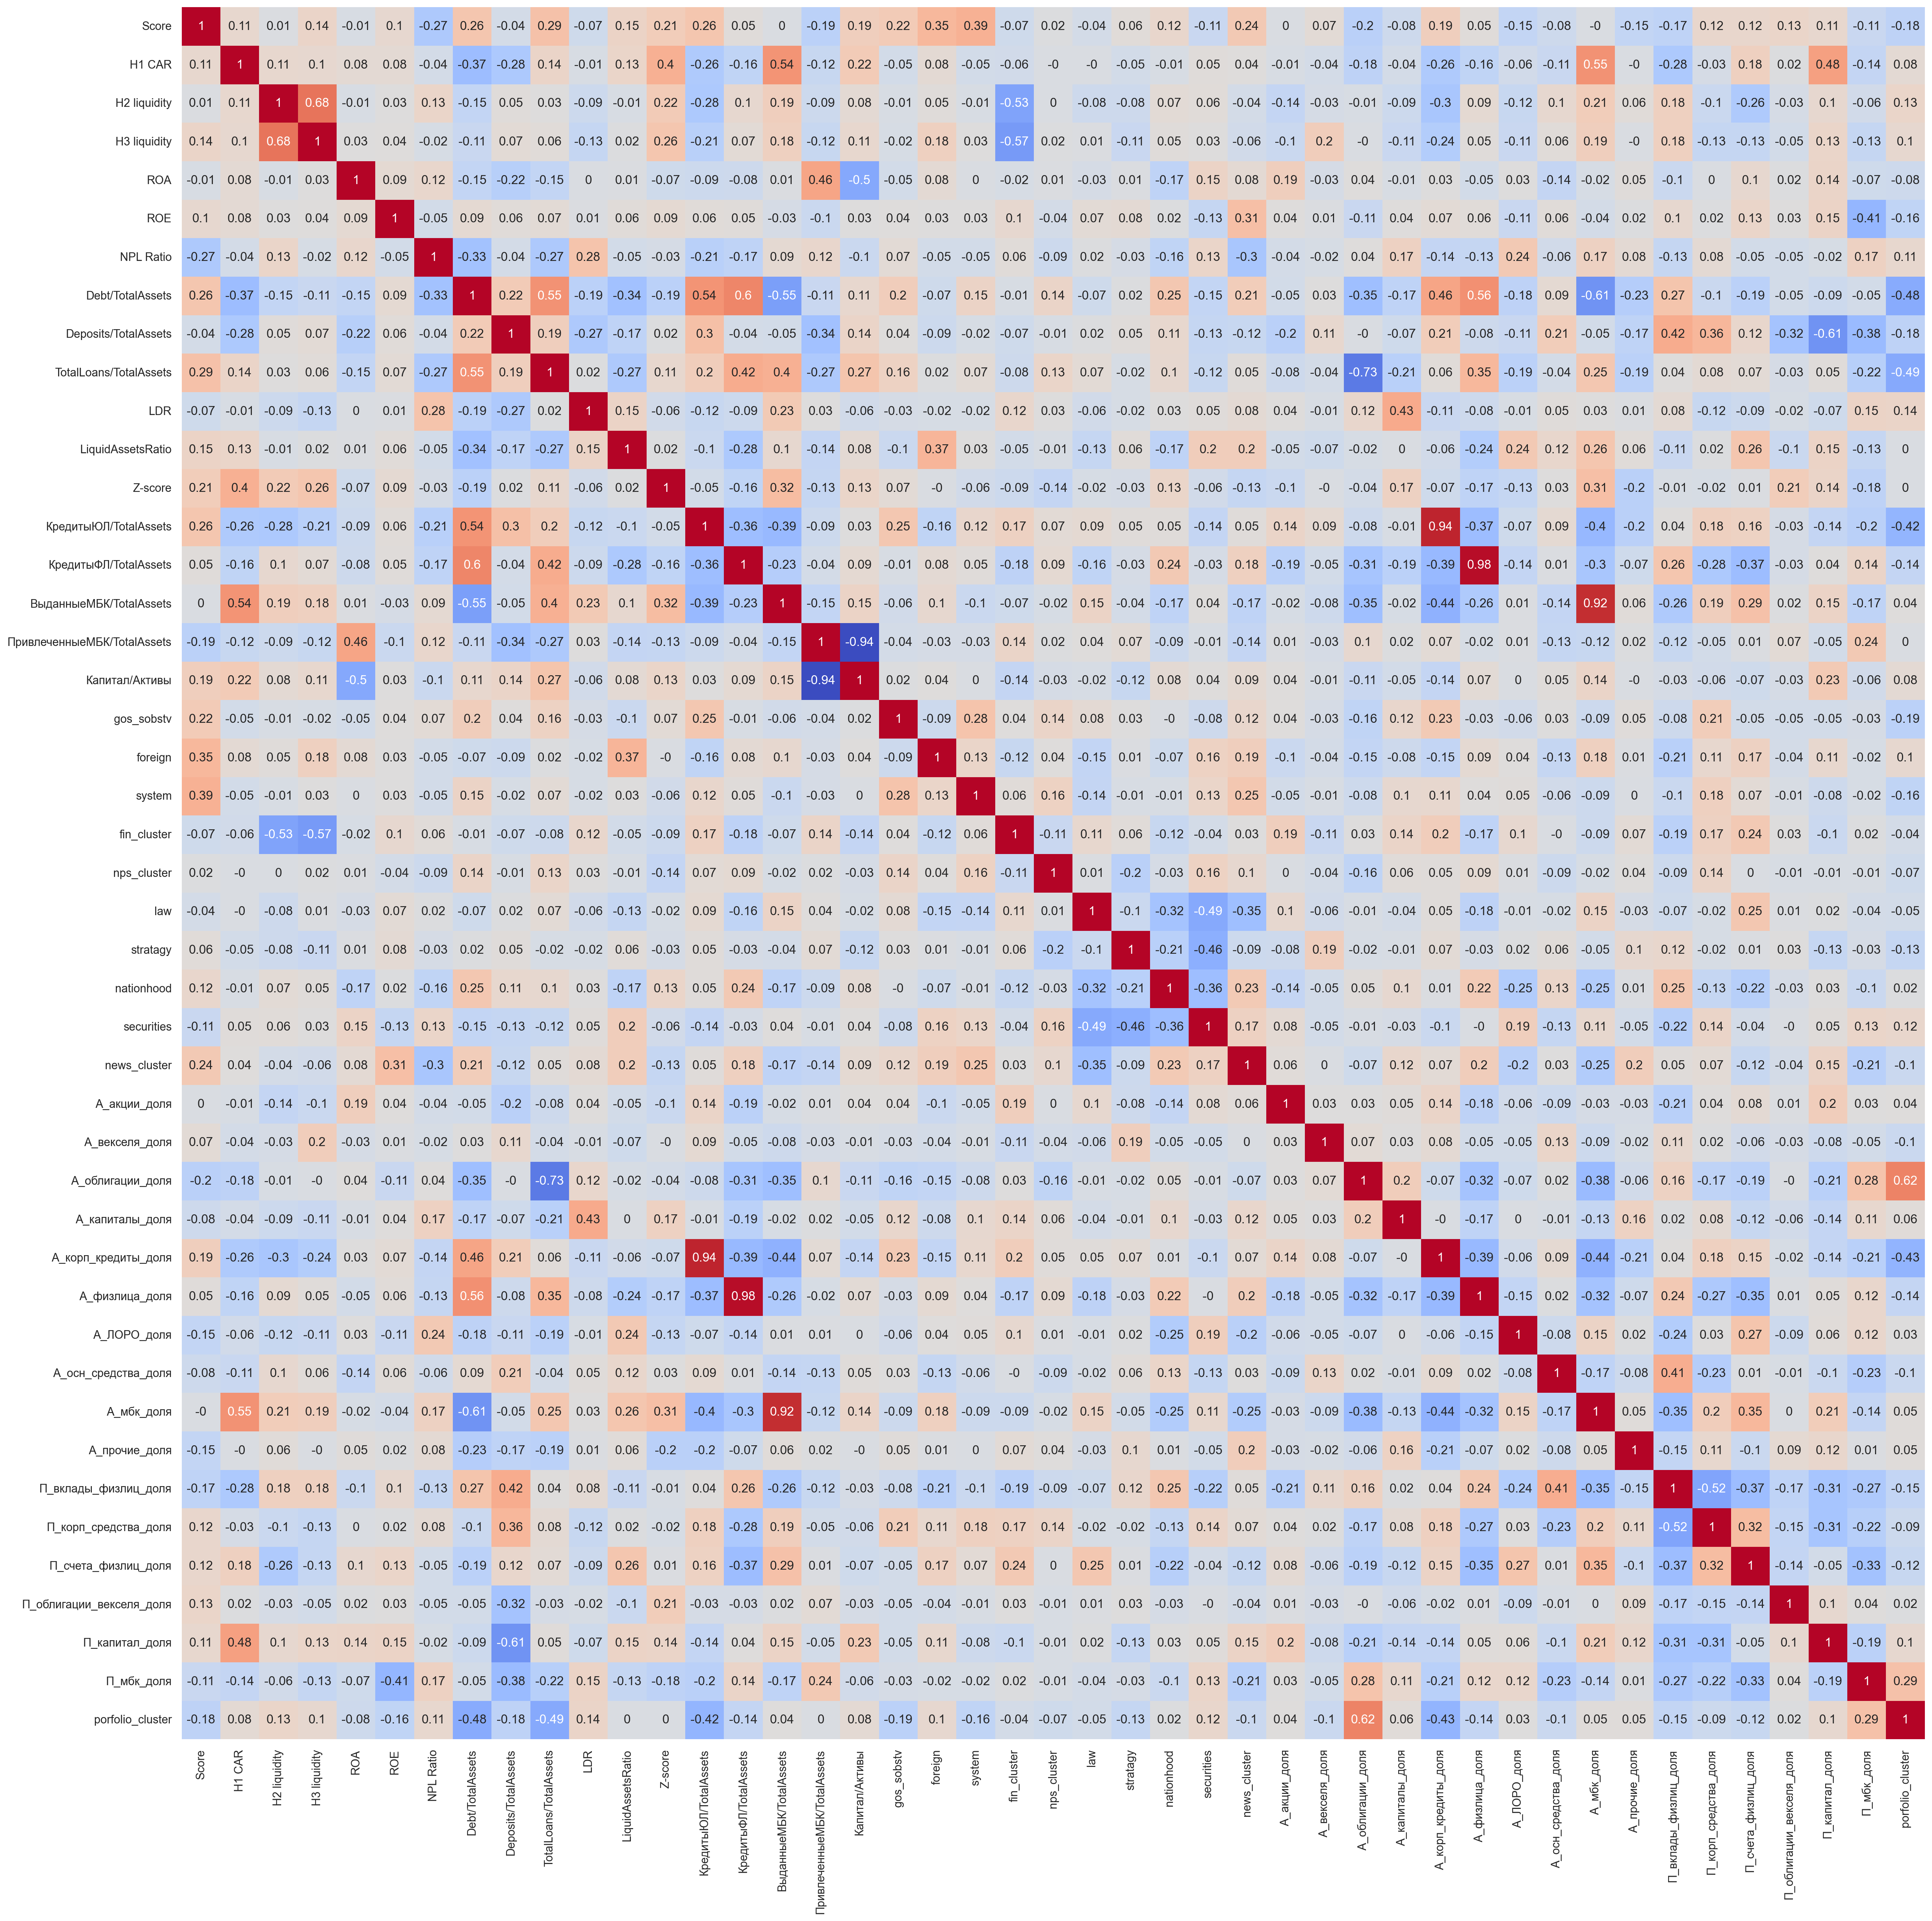

In [36]:
sns.set(rc={'figure.figsize':(30, 30)})
fig, ax = plt.subplots()
sns.heatmap(regression_data.corr(method='pearson').round(2), annot=True, cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('corr_matrix.png', bbox_inches='tight', pad_inches=0.0)
plt.show()

In [38]:
regression_data.isna().sum()

Bank                           0
Score                          0
Н1 CAR                         0
Н2 liquidity                   0
Н3 liquidity                   0
ROA                            0
ROE                            0
NPL Ratio                      0
Debt/TotalAssets               0
Deposits/TotalAssets           0
TotalLoans/TotalAssets         0
LDR                            0
LiquidAssetsRatio              0
Z-score                        0
КредитыЮЛ/TotalAssets          0
КредитыФЛ/TotalAssets          0
ВыданныеМБК/TotalAssets        0
ПривлеченныеМБК/TotalAssets    0
Капитал/Активы                 0
gos_sobstv                     0
foreign                        0
system                         0
fin_cluster                    0
nps_cluster                    0
law                            0
stratagy                       0
nationhood                     0
securities                     0
news_cluster                   0
А_акции_доля                   0
А_векселя_

In [41]:
scores = regression_data['Score']
print(f'quantile 0.0: {round(scores.quantile(0.0), 2)}')
print(f'quantile 0.2: {round(scores.quantile(0.2), 2)}')
print(f'quantile 0.4: {round(scores.quantile(0.4), 2)}')
print(f'quantile 0.6: {round(scores.quantile(0.6), 2)}')
print(f'quantile 0.8: {round(scores.quantile(0.8), 2)}')

quantile 0.0: 4.03
quantile 0.2: 40.01
quantile 0.4: 46.0
quantile 0.6: 52.09
quantile 0.8: 60.02


In [52]:
rename_cols = {
    'Н1 CAR':'Н1_CAR', 
    'Н2 liquidity':'Н2_liquidity', 
    'Н3 liquidity':'Н3_liquidity', 
    'NPL Ratio':'NPL_Ratio', 
    'Debt/TotalAssets':'Debt_TotalAssets', 
    'Deposits/TotalAssets':'Deposits_TotalAssets',
    'TotalLoans/TotalAssets':'TotalLoans_TotalAssets', 
    'Z-score':'Z_score',
    'КредитыЮЛ/TotalAssets':'LoansLE_TotalAssets', 
    'КредитыФЛ/TotalAssets':'LoansIn_TotalAssets',
    'ВыданныеМБК/TotalAssets':'IssuedMbcs_TotalAssets', 
    'ПривлеченныеМБК/TotalAssets':'AttractedMbcs_TotalAssets',
    'Капитал/Активы':'Capital_assets',  
    'А_акции_доля':'A_Shares', 
    'А_векселя_доля':'A_Promissory_notes', 
    'А_облигации_доля':'A_bonds',
    'А_капиталы_доля':'A_capitals', 
    'А_корп_кредиты_доля':'A_corporate_loans', 
    'А_физлица_доля':'A_individuals_loans',
    'А_ЛОРО_доля':'A_loro_loans', 
    'А_осн_средства_доля':'A_fixed_assets', 
    'А_мбк_доля':'A_Mbcs', 
    'А_прочие_доля':'A_rest',
    'П_вклады_физлиц_доля':'P_deposits_individuals', 
    'П_корп_средства_доля':'P_corporate_funds', 
    'П_счета_физлиц_доля':'P_accounts_individuals',
    'П_облигации_векселя_доля':'P_bonds_promissory_notes', 
    'П_капитал_доля':'P_capitals', 
    'П_мбк_доля':'P_Mbcs',
    'stratagy':'strategy'
}

In [53]:
regression_data = regression_data.rename(columns=rename_cols)

In [58]:
regression_data.columns

Index(['Bank', 'Score', 'Н1_CAR', 'Н2_liquidity', 'Н3_liquidity', 'ROA', 'ROE',
       'NPL_Ratio', 'Debt_TotalAssets', 'Deposits_TotalAssets',
       'TotalLoans_TotalAssets', 'LDR', 'LiquidAssetsRatio', 'Z_score',
       'LoansLE_TotalAssets', 'LoansIn_TotalAssets', 'IssuedMbcs_TotalAssets',
       'AttractedMbcs_TotalAssets', 'Capital_assets', 'gos_sobstv', 'foreign',
       'system', 'fin_cluster', 'nps_cluster', 'law', 'stratagy', 'nationhood',
       'securities', 'news_cluster', 'A_Shares', 'A_Promissory_notes',
       'A_bonds', 'A_capitals', 'A_corporate_loans', 'A_indovoduals_loans',
       'A_loro_loans', 'A_fixed_assets', 'A_Mbcs', 'A_rest',
       'P_deposits_individuals', 'P_corporate_funds', 'P_accounts_individuals',
       'P_bonds_promissory_notes', 'P_capitals', 'P_Mbcs', 'porfolio_cluster'],
      dtype='object')

In [56]:
regression_data.to_excel('final_df.xlsx')

___